# 0. Importar Librerías

In [1]:
#Librerías de interés.
import pandas as pd                                   #Importamos la librería pandas. Nos va a servir para leer y manipular conjuntos de datos tabulares.
import matplotlib.pyplot as plt                       #Importamos pyplot de librería matplotlib. Lo vamos a utilizar para graficar.
from matplotlib.colors import LinearSegmentedColormap #Útil para definir un mapa de color por segmentos lineales. 
import numpy as np                                    #Importamos la librería numpy para manipular arreglos. 
import seaborn as sns

#from google.colab import files                        #Esta librería nos sirve para cargar archivos desde el disco duro.

#!pip install sklearn --upgrade                       #En caso que requiera actualizar sklearn. 
from sklearn.model_selection import train_test_split  #Útil para dividir los conjuntos de datos. 
from sklearn.preprocessing import MinMaxScaler        #Útil para escalar los atributos de entrada.
import sklearn.datasets as dt                         #Útil para crear datasets sintéticos para hacer pruebas. 
from sklearn.linear_model import LogisticRegression   #Modelo de regresión logística para clasificación. 
from sklearn import metrics                           #Permite calcular algunas métricas de desempeño.

from copy import deepcopy                             #Permite hacer copias profundas. 

# 1. Cargar Datos

Breast Cancer Prediction Dataset

https://www.kaggle.com/datasets/merishnasuwal/breast-cancer-prediction-dataset

In [2]:
df = pd.read_csv("Breast_cancer_data.csv")

# 2. Análisis Exploratorio de los Datos (EDA).

In [3]:
df.shape

(569, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [5]:
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [6]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


Conteo de objetos por clase:
1    357
0    212
Name: diagnosis, dtype: int64

El tipo de este objeto es:  <class 'pandas.core.series.Series'> 



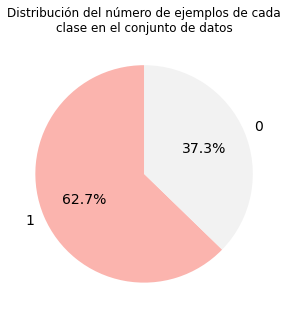

In [7]:
#Econtremos cómo están repartidas las categorías en el conjunto de datos. 
conteo_de_ejemplos_por_clase = df['diagnosis'].value_counts()
print('Conteo de objetos por clase:\n', conteo_de_ejemplos_por_clase, '\n',sep='')
print('El tipo de este objeto es: ', type(conteo_de_ejemplos_por_clase),'\n')

#Revisemos esta información de forma gráfica.
#-------------------------------------------------------------------------------
#Opción 1: usemos un gráfico tipo pastel desde pandas. 
#-------------------------------------------------------------------------------
conteo_de_ejemplos_por_clase.plot(kind='pie', 
                                    figsize=(5, 5),
                                    autopct='%1.1f%%',  #Esto muestra úicamente el porcentaje de ejemplos de cada categoría en el gráfico. 
                                    #autopct=lambda pct: '{:.1f}%\n({:d})'.format(pct, int(pct/100.*conteo_de_ejemplos_por_clase.sum())), #Con esta función lambda se puede mostrar el porcentaje y el número absoluto de ejemplos en cada categoría. 
                                    startangle=90,       #Esto define la orientación de la línea vertical inicial de las divisiones del pie chart.
                                    fontsize=14,         #Tamaño de los textos.         
                                    cmap='Pastel1')      #Para otros color maps visite: https://matplotlib.org/stable/tutorials/colors/colormaps.html
titulo = 'Distribución del número de ejemplos de cada\nclase en el conjunto de datos'
plt.title(titulo) 
plt.ylabel('') #Esto es para evitar un texto en el eje y que diría Species.
plt.show()

In [8]:
df_clean = deepcopy(df)
df_clean.shape

(569, 6)

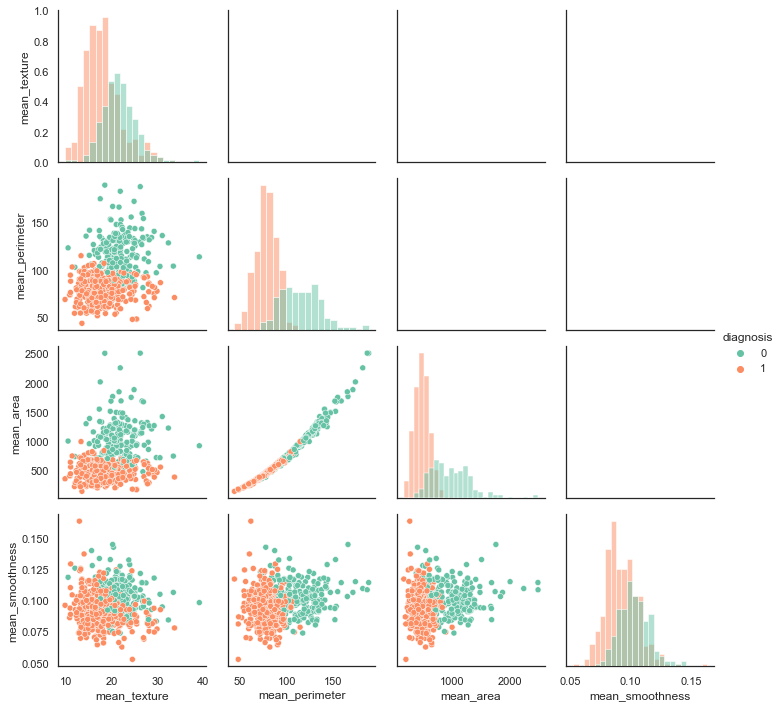

In [9]:
sns.set(style='white')
sns.set_palette('Set2')

g = sns.PairGrid(data=df_clean.iloc[:,1:],hue='diagnosis',diag_sharey=False, corner=False)

g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)

g.add_legend()
plt.show()

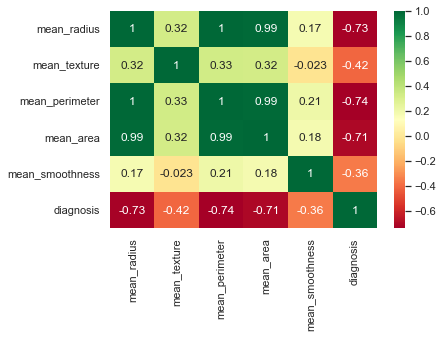

In [10]:
ax = sns.heatmap(df_clean.corr(),annot=True,cmap='RdYlGn')

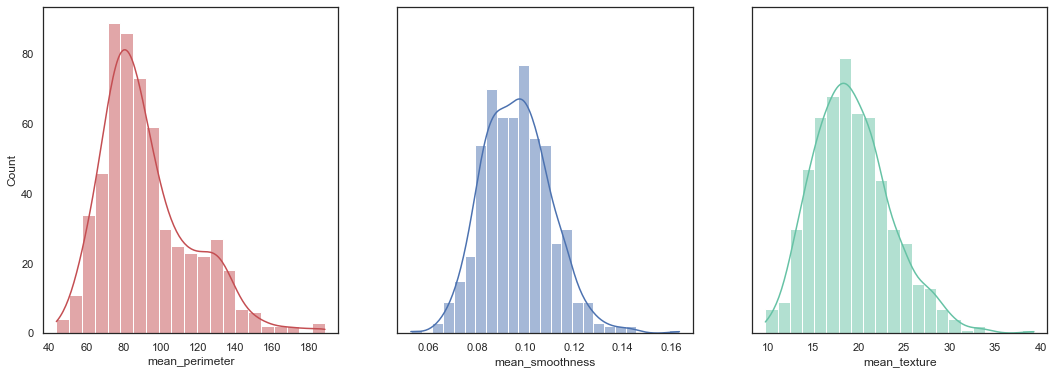

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
sns.histplot(df_clean, ax=axes[0], x="mean_perimeter", kde=True, color='r')
sns.histplot(df_clean, ax=axes[1], x="mean_smoothness", kde=True, color='b')
sns.histplot(df_clean, ax=axes[2], x="mean_texture", kde=True)
plt.show()

# 3. Modelo

Clasificador Bayesiano Ingenuo

### 3.1 Construcción del Modelo

In [12]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()

### 3.2 Baseline

In [13]:
count_p = (df_clean["diagnosis"] == 1).sum()
print("Número de Observaciones para Cáncer: ", count_p)

count_n = (df_clean["diagnosis"] == 0).sum()
print("Número de Observaciones para NO Cáncer: ", count_n)

print("Línea Base: %.2f" % (100*max(count_n,count_p)/(count_p+count_n)))

Número de Observaciones para Cáncer:  357
Número de Observaciones para NO Cáncer:  212
Línea Base: 62.74


### 3.3 Selección de Predictores

In [14]:
#Nombre de la salida deseada:
nombre_de_la_variable_de_salida='diagnosis' 

#Nombre de los posibles atributos de entrada:
#"mean_radius"
#"mean_texture"
#"mean_perimeter"
#"mean_area"
#"mean_smoothness"

nombre_de_las_variables_de_entrada = ['mean_texture','mean_perimeter','mean_smoothness']
#nombre_de_las_variables_de_entrada = ['mean_radius','mean_texture','mean_perimeter','mean_area','mean_smoothness']

df_y = df_clean[nombre_de_la_variable_de_salida]
print('Dataframe de salida:')
print(df_y)

df_x = deepcopy(df_clean[nombre_de_las_variables_de_entrada])
print('\nDataframe de entrada:')
print(type(df_x))
print(df_x)

Dataframe de salida:
0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: int64

Dataframe de entrada:
<class 'pandas.core.frame.DataFrame'>
     mean_texture  mean_perimeter  mean_smoothness
0           10.38          122.80          0.11840
1           17.77          132.90          0.08474
2           21.25          130.00          0.10960
3           20.38           77.58          0.14250
4           14.34          135.10          0.10030
..            ...             ...              ...
564         22.39          142.00          0.11100
565         28.25          131.20          0.09780
566         28.08          108.30          0.08455
567         29.33          140.10          0.11780
568         24.54           47.92          0.05263

[569 rows x 3 columns]


In [15]:
# Vamos a dividir los datos en un conjunto de entrenamiento, un conjunto de desarrollo o validación, y un conjunto de pruebas.
mezclar_los_datos       = True #Vamos a mezclar de forma aleatoria los datos antes de particionarlos. 
valor_semilla_aleatoria = 42
4#Esto es útil si se quiere garantizar la repetibilidad 
                               #de la partición de datos en ejecuciones sucesivas de su notebook o script. 

#Porcentajes de división de datos. 
particion_para_entrenamiento = 0.6  #Dejamos el 60% de los datos para el conjunto de entrenamiento (training set).
particion_para_desarrollo    = 0.2  #Dejamos el 20% de los datos para el conjunto de desarrollo (dev set).
                                    #Este conjunto se conoce también como: selección del modelo, validación, o hold-out.
particion_para_entrenamiento_y_desarrollo = particion_para_entrenamiento+particion_para_desarrollo #Variable auxiliar. 
particion_para_pruebas       = 1.0-particion_para_entrenamiento_y_desarrollo #Dejamos los otros datos, correspondiente al 20%, para el conjunto de pruebas. 

#Hacemos la partición para obtener el conjunto de pruebas y el "resto" (i.e.: entrenamiento y desarrollo).
df_x_rest, df_x_test, df_y_rest, df_y_test = train_test_split(df_x,                                         #100% de los datos de entrada. 
                                                              df_y,                                         #100% de los datos de salida. 
                                                              test_size=particion_para_pruebas, 
                                                              random_state=valor_semilla_aleatoria, 
                                                              shuffle=mezclar_los_datos)

#Del "resto" obtenemos los conjuntos de entrenamiento y desarrollo. 
df_x_train, df_x_val, df_y_train, df_y_val = train_test_split(df_x_rest,                                    #Una fracción de los datos de entrada. 
                                                              df_y_rest,                                    #Una fracción de los datos de salida.        
                                                              test_size=particion_para_desarrollo/particion_para_entrenamiento_y_desarrollo, #cuidado! este es el porcentaje respecto al "resto". 
                                                              random_state=valor_semilla_aleatoria, 
                                                              shuffle=False) #Los datos ya se mezclaron arriba, no es necesario repetirlo acá.  

print('-----------------------------------------------------------------------')
print('Conjunto de datos de entrenamiento {:1.0f}%'.format(particion_para_entrenamiento*100))
print('-----------------------------------------------------------------------')
print(df_x_train.info(),'\n')

print('-----------------------------------------------------------------------')
print('Conjunto de datos de desarrollo {:1.0f}%'.format(particion_para_desarrollo*100))
print('-----------------------------------------------------------------------')
print(df_x_val.info(),'\n')

print('-----------------------------------------------------------------------')
print('Conjunto de datos de prueba {:1.0f}%'.format(particion_para_pruebas*100))
print('-----------------------------------------------------------------------')
print(df_x_test.info(),'\n',sep='')

conteo_de_ejemplos_por_clase = df_y_train.value_counts()
print('Conteo de objetos por clase en el conjunto de entrenamiento:\n', conteo_de_ejemplos_por_clase, '\n',sep='')
print('El porcentaje de tipo 1 en el conjunto de entrenamiento es: ', 100*(conteo_de_ejemplos_por_clase[1]/sum(conteo_de_ejemplos_por_clase)),'%\n')

conteo_de_ejemplos_por_clase = df_y_val.value_counts()
print('Conteo de objetos por clase en el conjunto de validación:\n', conteo_de_ejemplos_por_clase, '\n',sep='')
print('El porcentaje de tipo 1 en el conjunto de validación es: ', 100*(conteo_de_ejemplos_por_clase[1]/sum(conteo_de_ejemplos_por_clase)),'%\n')

conteo_de_ejemplos_por_clase = df_y_test.value_counts()
print('Conteo de objetos por clase en el conjunto de prueba:\n', conteo_de_ejemplos_por_clase, '\n',sep='')
print('El porcentaje de tipo 1 en el conjunto de prueba es: ', 100*(conteo_de_ejemplos_por_clase[1]/sum(conteo_de_ejemplos_por_clase)),'%\n')

-----------------------------------------------------------------------
Conjunto de datos de entrenamiento 60%
-----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 341 entries, 68 to 200
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_texture     341 non-null    float64
 1   mean_perimeter   341 non-null    float64
 2   mean_smoothness  341 non-null    float64
dtypes: float64(3)
memory usage: 10.7 KB
None 

-----------------------------------------------------------------------
Conjunto de datos de desarrollo 20%
-----------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 114 entries, 134 to 102
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_texture     114 non-null    float64
 1   mean_

### 3.4 Entrenamiento

In [16]:
gnb.fit(df_x_train, df_y_train)

GaussianNB()

# 4. Evaluación

### Inicialmente se va a evaluar la predicción en el conjunto de entrenamiento.

In [23]:
# predict class
y_pred_train = gnb.predict(df_x_train)

Accuracy: 0.9296
TPR: 0.9772
FPR: 0.1557


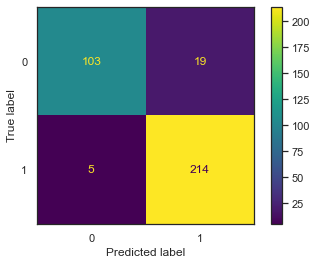

In [24]:
cm = metrics.confusion_matrix(df_y_train,y_pred_train)
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TPR = TP/(TP+FN)
FPR = FP/(FP+TN)
acc = (TP+TN)/(TP+TN+FP+FN)
print('Accuracy: %.4f' % acc)
print('TPR: %.4f' % TPR)
print('FPR: %.4f' % FPR)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

### Ahora se va a evaluar la predicción en el conjunto de validación.

In [25]:
# predict class
y_pred_val = gnb.predict(df_x_val)

Accuracy: 0.8684
TPR: 0.9104
FPR: 0.1915


<function matplotlib.pyplot.show(close=None, block=None)>

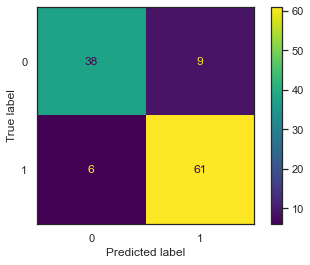

In [27]:
cm = metrics.confusion_matrix(df_y_val,y_pred_val)
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TPR = TP/(TP+FN)
FPR = FP/(FP+TN)
acc = (TP+TN)/(TP+TN+FP+FN)
print('Accuracy: %.4f' % acc)
print('TPR: %.4f' % TPR)
print('FPR: %.4f' % FPR)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show

### En este momento vamos a hacer la evaluación ajustando el umbral de clasificación. Pero primero debemos determinar el umbral, para lo cual vamos a usar la curva ROC y la métrica AUC.

In [28]:
y_prob = gnb.predict_proba(df_x_train)
print(y_prob)

[[3.17476872e-02 9.68252313e-01]
 [9.99999781e-01 2.19014659e-07]
 [2.00661074e-03 9.97993389e-01]
 [1.43625182e-01 8.56374818e-01]
 [3.32947424e-02 9.66705258e-01]
 [9.63139446e-01 3.68605537e-02]
 [2.33049506e-01 7.66950494e-01]
 [1.49577853e-02 9.85042215e-01]
 [1.95480670e-02 9.80451933e-01]
 [9.99774933e-01 2.25067476e-04]
 [6.38488810e-02 9.36151119e-01]
 [9.99972712e-01 2.72875025e-05]
 [6.51789205e-01 3.48210795e-01]
 [1.24897459e-02 9.87510254e-01]
 [1.99497698e-02 9.80050230e-01]
 [9.99844876e-01 1.55123870e-04]
 [9.94242204e-01 5.75779633e-03]
 [9.92689960e-01 7.31004031e-03]
 [2.42903995e-02 9.75709601e-01]
 [2.15686685e-02 9.78431332e-01]
 [6.12292319e-02 9.38770768e-01]
 [5.31419934e-01 4.68580066e-01]
 [2.22974440e-01 7.77025560e-01]
 [6.67605142e-02 9.33239486e-01]
 [3.98939712e-01 6.01060288e-01]
 [3.71658850e-01 6.28341150e-01]
 [4.10199478e-02 9.58980052e-01]
 [9.99768458e-01 2.31541588e-04]
 [7.62042954e-03 9.92379570e-01]
 [3.37789174e-03 9.96622108e-01]
 [4.037184

### Curva ROC (Receiver Operating Characteristic) y Métrica AUC(Area Under the Curve)

In [29]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def curva_roc(y_prob, df_y):
    
    ns_prob = [0 for _ in range(len(df_y))]

    # keep probabilities for the positive outcome only
    y_prob_val_c1 = y_prob[:, 1]

    # calculate scores
    ns_auc = roc_auc_score(df_y, ns_prob)
    log_reg_auc = roc_auc_score(df_y, y_prob_val_c1)

    # summarize scores
    print('No Skill: ROC AUC=%.4f' % (ns_auc))
    print('Logistic: ROC AUC=%.4f' % (log_reg_auc))

    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(df_y, ns_prob)
    log_reg_fpr, log_reg_tpr, ths = roc_curve(df_y, y_prob_val_c1)

    # plot the roc curve for the model
    plt.plot(ns_fpr, ns_tpr, linestyle='--', color = 'b', label='No Skill')
    plt.plot(log_reg_fpr, log_reg_tpr, marker='.', color = 'r', label='Logistic')

    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()
    
    return ths

No Skill: ROC AUC=0.5000
Logistic: ROC AUC=0.9803


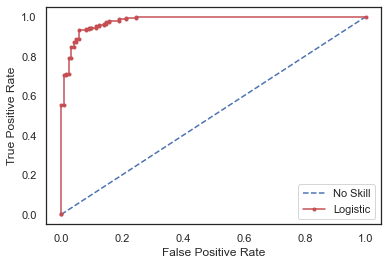

In [30]:
ths = curva_roc(y_prob,df_y_train)

### Ahora vamos a encontrar el umbral que genera el punto más cercano al ideal FPR=0 y TPR=1

In [31]:
# keep probabilities for the positive outcome only

def umbral_optimo(y_prob,df_y,ths):
    
    y_prob_c1 = y_prob[:, 1]
    roc = []
    for j in range (len(ths)):
        y_pred = np.zeros(len(y_prob_c1))
        for i in range(len(y_prob_c1)):
            if (y_prob_c1[i] >= ths[j]):
                y_pred[i] = 1
        cm = metrics.confusion_matrix(df_y,y_pred)
        TP = cm[1,1]
        TN = cm[0,0]
        FP = cm[0,1]
        FN = cm[1,0]
        TPR = TP/(TP+FN)
        FPR = FP/(FP+TN)
        roc.append((TPR,FPR,ths[j]))    

    roc = np.array(roc)  
    
    distance_to_top_left_corner = []

    for i in range(len(roc)):
        distance_to_top_left_corner.append( np.sqrt( ((roc[i,1]-0)**2)+((roc[i,0]-1)**2) ) )

    index_of_best_threshold = distance_to_top_left_corner.index(min(distance_to_top_left_corner)) #Retorna el índice con la menor distancia
    best_threshold          = ths[index_of_best_threshold]
    #print('El mejor umbral para el conjunto de validación es {:.4f}.'.format(best_threshold))
    return best_threshold

In [32]:
best_th = umbral_optimo(y_prob,df_y_train,ths)
print('El mejor umbral es {:.4f}.'.format(best_th))

El mejor umbral es 0.7040.


### Con ese umbral asignamos las clases y probamos la clasificación en el conjunto de entranamiento y validación.

Accuracy: 0.9355
TPR: 0.9315
FPR: 0.0574


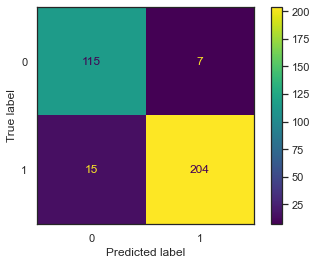

In [34]:
# predict probabilities on the training set
y_prob = gnb.predict_proba(df_x_train)

# predict class
y_prob_c1 = y_prob[:, 1]
th = best_th
y_pred = np.zeros(len(y_prob_c1))
for i in range(len(y_prob_c1)):
    if (y_prob_c1[i] >= th):
        y_pred[i] = 1

#Evaluation on the training set
cm = metrics.confusion_matrix(df_y_train,y_pred)
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TPR = TP/(TP+FN)
FPR = FP/(FP+TN)
acc = (TP+TN)/(TP+TN+FP+FN)
print('Accuracy: %.4f' % acc)
print('TPR: %.4f' % TPR)
print('FPR: %.4f' % FPR)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

Accuracy: 0.8509
TPR: 0.8209
FPR: 0.1064


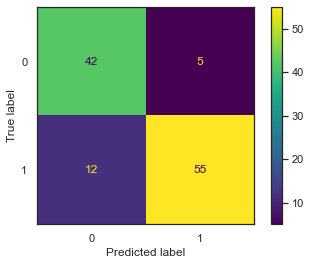

In [35]:
# predict probabilities on the validation set
y_prob = gnb.predict_proba(df_x_val)

# predict class
y_prob_c1 = y_prob[:, 1]
th = best_th
y_pred = np.zeros(len(y_prob_c1))
for i in range(len(y_prob_c1)):
    if (y_prob_c1[i] >= th):
        y_pred[i] = 1

#Evaluation on the training set
cm = metrics.confusion_matrix(df_y_val,y_pred)
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TPR = TP/(TP+FN)
FPR = FP/(FP+TN)
acc = (TP+TN)/(TP+TN+FP+FN)
print('Accuracy: %.4f' % acc)
print('TPR: %.4f' % TPR)
print('FPR: %.4f' % FPR)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

# Probar Otro Modelo

Regresión Logística

### Normalización (Opcional)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_x_train = scaler.fit_transform(df_x_train)
df_x_val = scaler.transform(df_x_val)
df_x_test = scaler.transform(df_x_test)

In [36]:
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

from sklearn.linear_model import LogisticRegression

log_reg_1 = LogisticRegression()

log_reg_1.fit(df_x_train,df_y_train)

LogisticRegression()

### Inicialmente se va a evaluar la predicción en el conjunto de entrenamiento.

In [37]:
# predict class
y_pred_train = log_reg_1.predict(df_x_train)

Accuracy: 0.9062
TPR: 0.9452
FPR: 0.1639


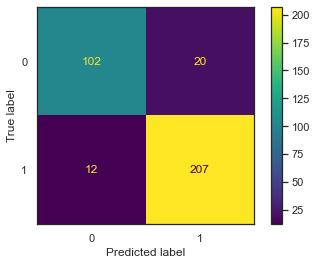

In [38]:
cm = metrics.confusion_matrix(df_y_train,y_pred_train)
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TPR = TP/(TP+FN)
FPR = FP/(FP+TN)
acc = (TP+TN)/(TP+TN+FP+FN)
print('Accuracy: %.4f' % acc)
print('TPR: %.4f' % TPR)
print('FPR: %.4f' % FPR)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

### Ahora se va a evaluar la predicción en el conjunto de validación.

In [39]:
# predict class
y_pred_val = log_reg_1.predict(df_x_val)

Accuracy: 0.8421
TPR: 0.8955
FPR: 0.2340


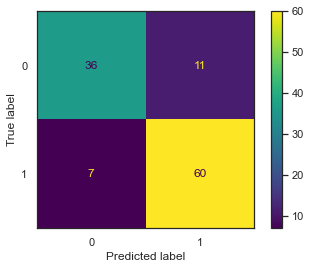

In [40]:
cm = metrics.confusion_matrix(df_y_val,y_pred_val)
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TPR = TP/(TP+FN)
FPR = FP/(FP+TN)
acc = (TP+TN)/(TP+TN+FP+FN)
print('Accuracy: %.4f' % acc)
print('TPR: %.4f' % TPR)
print('FPR: %.4f' % FPR)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

### En este momento vamos a hacer la evaluación ajustando el umbral de clasificación. Pero primero debemos determinar el umbral, para lo cual vamos a usar la curva ROC y la métrica AUC.

In [52]:
# predict probabilities
y_prob = log_reg_1.predict_proba(df_x_train)
print(y_prob)

[[1.31149150e-03 9.98688509e-01]
 [9.99904452e-01 9.55481619e-05]
 [5.82810234e-04 9.99417190e-01]
 [3.98683877e-02 9.60131612e-01]
 [1.81488468e-03 9.98185115e-01]
 [8.86403372e-01 1.13596628e-01]
 [4.95797354e-01 5.04202646e-01]
 [8.05842582e-03 9.91941574e-01]
 [3.42671716e-02 9.65732828e-01]
 [9.96677285e-01 3.32271546e-03]
 [1.06024448e-01 8.93975552e-01]
 [9.99085043e-01 9.14957483e-04]
 [4.15014279e-01 5.84985721e-01]
 [2.68575169e-03 9.97314248e-01]
 [8.15603001e-02 9.18439700e-01]
 [9.98915242e-01 1.08475772e-03]
 [8.81042890e-01 1.18957110e-01]
 [9.80111776e-01 1.98882245e-02]
 [2.32477244e-01 7.67522756e-01]
 [2.44975956e-02 9.75502404e-01]
 [2.02279109e-01 7.97720891e-01]
 [4.19975953e-01 5.80024047e-01]
 [1.82205346e-01 8.17794654e-01]
 [8.82885813e-03 9.91171142e-01]
 [2.37650340e-01 7.62349660e-01]
 [4.65334583e-01 5.34665417e-01]
 [8.19981488e-03 9.91800185e-01]
 [9.97742080e-01 2.25791982e-03]
 [1.12980393e-03 9.98870196e-01]
 [1.86820397e-02 9.81317960e-01]
 [2.678083

### Curva ROC (Receiver Operating Characteristic) y Métrica AUC(Area Under the Curve)

In [55]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

def curva_roc(y_prob, df_y):
    
    ns_prob = [0 for _ in range(len(df_y))]

    # keep probabilities for the positive outcome only
    y_prob_val_c1 = y_prob[:, 1]

    # calculate scores
    ns_auc = roc_auc_score(df_y, ns_prob)
    log_reg_auc = roc_auc_score(df_y, y_prob_val_c1)

    # summarize scores
    print('No Skill: ROC AUC=%.4f' % (ns_auc))
    print('Logistic: ROC AUC=%.4f' % (log_reg_auc))

    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(df_y, ns_prob)
    log_reg_fpr, log_reg_tpr, ths = roc_curve(df_y, y_prob_val_c1)

    # plot the roc curve for the model
    plt.plot(ns_fpr, ns_tpr, linestyle='--', color = 'b', label='No Skill')
    plt.plot(log_reg_fpr, log_reg_tpr, marker='.', color = 'r', label='Logistic')

    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    # show the legend
    plt.legend()
    # show the plot
    plt.show()
    
    return ths

No Skill: ROC AUC=0.5000
Logistic: ROC AUC=0.9571


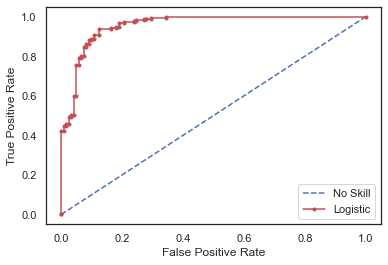

In [56]:
ths = curva_roc(y_prob,df_y_train)

### Ahora vamos a encontrar el umbral que genera el punto más cercano al ideal FPR=0 y TPR=1

In [58]:
# keep probabilities for the positive outcome only

def umbral_optimo(y_prob,df_y,ths):
    
    y_prob_c1 = y_prob[:, 1]
    roc = []
    for j in range (len(ths)):
        y_pred = np.zeros(len(y_prob_c1))
        for i in range(len(y_prob_c1)):
            if (y_prob_c1[i] >= ths[j]):
                y_pred[i] = 1
        cm = metrics.confusion_matrix(df_y,y_pred)
        TP = cm[1,1]
        TN = cm[0,0]
        FP = cm[0,1]
        FN = cm[1,0]
        TPR = TP/(TP+FN)
        FPR = FP/(FP+TN)
        roc.append((TPR,FPR,ths[j]))    

    roc = np.array(roc)  
    
    distance_to_top_left_corner = []

    for i in range(len(roc)):
        distance_to_top_left_corner.append( np.sqrt( ((roc[i,1]-0)**2)+((roc[i,0]-1)**2) ) )

    index_of_best_threshold = distance_to_top_left_corner.index(min(distance_to_top_left_corner)) #Retorna el índice con la menor distancia
    best_threshold          = ths[index_of_best_threshold]
    #print('El mejor umbral para el conjunto de validación es {:.4f}.'.format(best_threshold))
    return best_threshold

In [59]:
best_th = umbral_optimo(y_prob,df_y_train,ths)
print('El mejor umbral es {:.4f}.'.format(best_th))

El mejor umbral es 0.5996.


### Con ese umbral asignamos las clases y probamos la clasificación en el conjunto de entranamiento y validación.

Accuracy: 0.9150
TPR: 0.9361
FPR: 0.1230


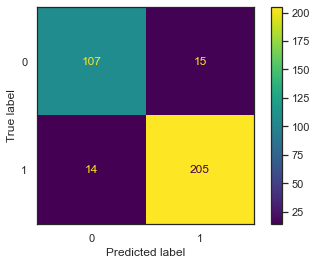

In [60]:
# predict probabilities on the training set
y_prob = log_reg_1.predict_proba(df_x_train)

# predict class
y_prob_c1 = y_prob[:, 1]
th = best_th
y_pred = np.zeros(len(y_prob_c1))
for i in range(len(y_prob_c1)):
    if (y_prob_c1[i] >= th):
        y_pred[i] = 1

#Evaluation on the training set
cm = metrics.confusion_matrix(df_y_train,y_pred)
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TPR = TP/(TP+FN)
FPR = FP/(FP+TN)
acc = (TP+TN)/(TP+TN+FP+FN)
print('Accuracy: %.4f' % acc)
print('TPR: %.4f' % TPR)
print('FPR: %.4f' % FPR)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

Accuracy: 0.8333
TPR: 0.8507
FPR: 0.1915


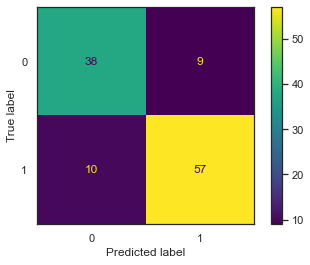

In [61]:
# predict probabilities on the validation set
y_prob = log_reg_1.predict_proba(df_x_val)

# predict class
y_prob_c1 = y_prob[:, 1]
th = best_th
y_pred = np.zeros(len(y_prob_c1))
for i in range(len(y_prob_c1)):
    if (y_prob_c1[i] >= th):
        y_pred[i] = 1

#Evaluation on the training set
cm = metrics.confusion_matrix(df_y_val,y_pred)
TP = cm[1,1]
TN = cm[0,0]
FP = cm[0,1]
FN = cm[1,0]
TPR = TP/(TP+FN)
FPR = FP/(FP+TN)
acc = (TP+TN)/(TP+TN+FP+FN)
print('Accuracy: %.4f' % acc)
print('TPR: %.4f' % TPR)
print('FPR: %.4f' % FPR)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()